In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import History
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [63]:
#Reading the dataset
dataset = pd.read_csv('Train.csv')
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


The data contains the following information:

ID: ID Number of Customers.  
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.  
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.  
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.  
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).  
Cost of the product: Cost of the Product in US Dollars.  
Prior purchases: The Number of Prior Purchase.  
Product importance: The company has categorized the product in the various parameter such as low, medium, high.  
Gender: Male and Female.  
Discount offered: Discount offered on that specific product.  
Weight in gms: It is the weight in grams.  
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0   indicates it has reached on time.  

In [64]:
dataset.shape

(10999, 12)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [66]:
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

**Observations:**
* No missing values in the dataset

In [67]:
#Basic summary statistics
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


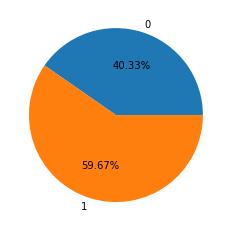

In [68]:
delay=pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%');

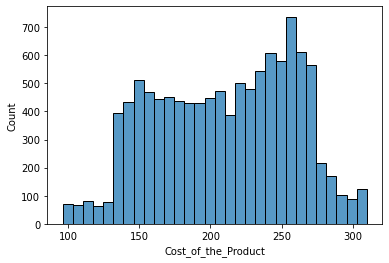

In [69]:
# dataset[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()
sns.histplot(data=dataset, x='Cost_of_the_Product');

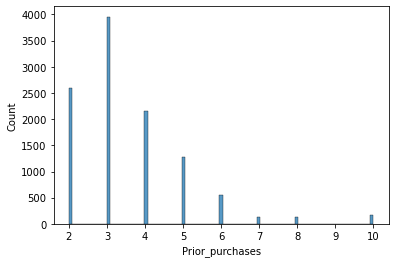

In [70]:
sns.histplot(data=dataset, x='Prior_purchases');

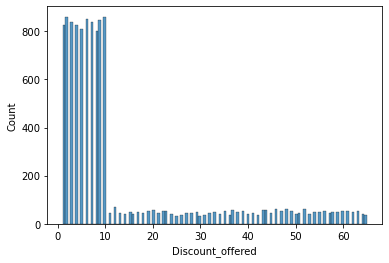

In [71]:
sns.histplot(data=dataset, x='Discount_offered');

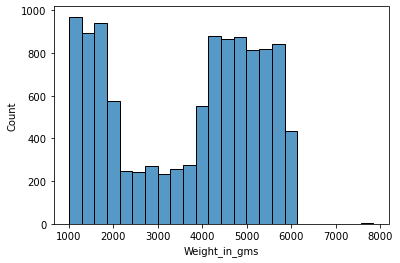

In [72]:
sns.histplot(data=dataset, x='Weight_in_gms');

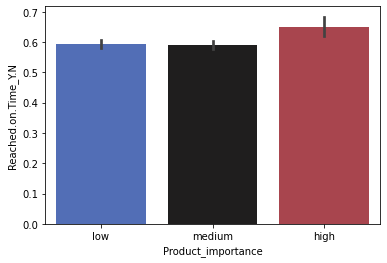

In [73]:
sns.barplot(x='Product_importance',y='Reached.on.Time_Y.N',palette='icefire',data=dataset);

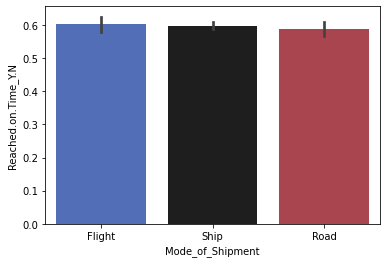

In [74]:
sns.barplot(x='Mode_of_Shipment',y='Reached.on.Time_Y.N',palette='icefire',data=dataset);

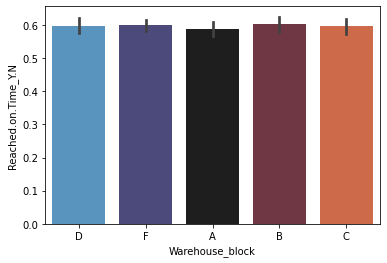

In [75]:
sns.barplot(x='Warehouse_block',y='Reached.on.Time_Y.N',palette='icefire',data=dataset);

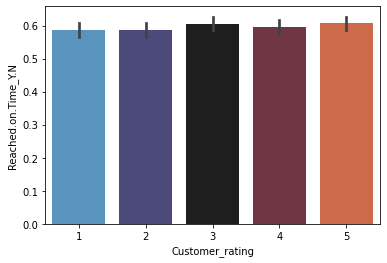

In [76]:
sns.barplot(x='Customer_rating',y='Reached.on.Time_Y.N',palette='icefire',data=dataset);

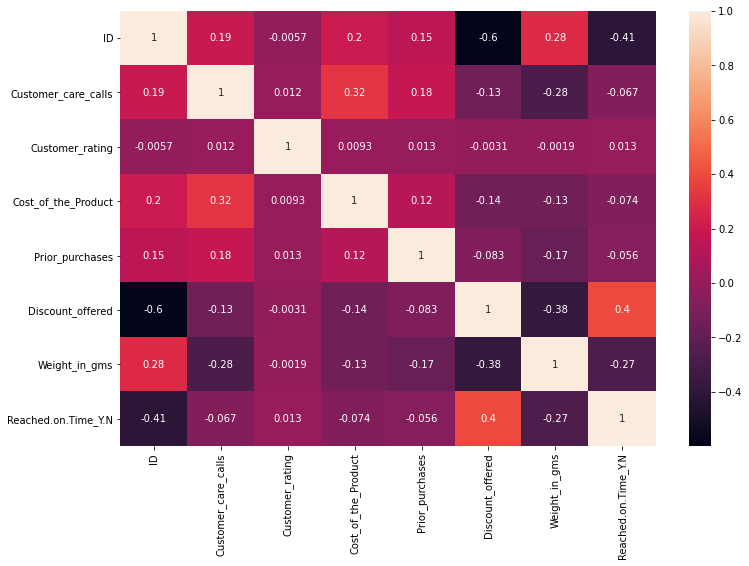

In [77]:
corr = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True);

# Data preparation

In [78]:
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [80]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]


In [82]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Discount_offered", "Weight_in_gms"])),
    ])

from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"])),
        ("cat_encoder", OneHotEncoder(sparse=False, drop='first')),
    ])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [83]:
X = data.drop(['Reached.on.Time_Y.N'], axis=1)
y = data['Reached.on.Time_Y.N']

In [84]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [85]:
test = pd.DataFrame(data=preprocess_pipeline.fit_transform(X, y))
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.0,2.0,177.0,3.0,44.0,1233.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,5.0,216.0,2.0,59.0,3088.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2.0,2.0,183.0,4.0,48.0,3374.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3.0,3.0,176.0,4.0,10.0,1177.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2.0,2.0,184.0,3.0,46.0,2484.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4.0,1.0,252.0,5.0,1.0,1538.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10995,4.0,1.0,232.0,5.0,6.0,1247.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10996,5.0,4.0,242.0,5.0,4.0,1155.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10997,5.0,2.0,223.0,6.0,2.0,1210.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [86]:
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

def GridSearch(X, y, scaler, classifier, kfold, param_grid):
    pipe = Pipeline([
        ('preprocessing', preprocess_pipeline),
        ('scaler', scaler),
        ('classifier', classifier)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
    grid.fit(X, y)
    return grid


def SVC_RBF(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = SVC(kernel='rbf')
    
    param_grid = {
        'classifier__C': [10, 100],
        'classifier__gamma':[0.001, 0.01, 0.1, 'auto'],
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def SVC_Poly(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = SVC(kernel='poly')
    
    param_grid = {
        'classifier__C': [0.01, 1],
        'classifier__coef0': [0.01, 1],
        'classifier__degree': [2]
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def SVC_Linear(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = LinearSVC(loss='squared_hinge', penalty='l2', dual=False, max_iter=50000)
    
    param_grid = {
        'classifier__C': [0.1, 1, 10],
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def Logistic(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = LogisticRegression(solver='liblinear')
    
    param_grid = {
        'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def RandomForest(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = RandomForestClassifier(random_state=seed, max_leaf_nodes=500)
    
    param_grid = {
        'classifier__n_estimators': [100, 500],
        'classifier__max_leaf_nodes': [2, 4, 8, 16]
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def GradientBoosting(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = GradientBoostingClassifier(random_state=seed)
    
    param_grid = {
        'classifier__n_estimators': [100, 500],
        'classifier__learning_rate': [0.01, 0.1]
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def XGBoost(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = XGBClassifier(use_label_encoder=False, verbosity=0)
    
    param_grid = {
        'classifier__max_depth': [3, 5, 8, 10],
        'classifier__learning_rate': [0.001, 0.01],
        'classifier__n_estimators': [50, 100],
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)


def KNearestNeighbors(X, y, kfold, scaler=StandardScaler(), seed=0):
    classifier = KNeighborsClassifier(algorithm='ball_tree')
    
    param_grid = {
        'classifier__n_neighbors': [5, 10],
        'classifier__leaf_size': [20, 50],
    }
    
    return GridSearch(X, y, scaler, classifier, kfold, param_grid)

In [87]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

seed = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

scaler = StandardScaler()


In [88]:
model_functions = [
    ("SVC RBF", SVC_RBF),
    ("SVC Poly", SVC_Poly),
    ("SVC Linear", SVC_Linear),
    ("Logistic", Logistic),
    ("Random Forest", RandomForest),
    ("Gradient Boosting", GradientBoosting),
    ("XGBoosting", XGBoost),
    ("K Nearest Neighbors", KNearestNeighbors),
]

print("Seed: {}\n".format(seed))

best_score = 0
best_result = ("None", 0, {})

for (name, function) in model_functions:
    model = function(X_train, y_train, kfold, scaler, seed)
    prediction = model.best_estimator_.predict(X_test)
    score = accuracy_score(y_test, prediction)
    if (score > best_score):
        best_score = score
        best_result = (name, score, model.best_params_)

    print(f"{name.ljust(19)}   {str(round(score, 6)).ljust(8)}   {model.best_params_}")

print(f"\nBest\n{best_result[0].ljust(19)}   {str(round(best_result[1], 6)).ljust(8)}   {best_result[2]}")


Seed: 1

SVC RBF               0.654545   {'classifier__C': 100, 'classifier__gamma': 0.001}
SVC Poly              0.676818   {'classifier__C': 0.01, 'classifier__coef0': 1, 'classifier__degree': 2}
SVC Linear            0.641818   {'classifier__C': 0.1}
Logistic              0.634545   {'classifier__C': 0.01}
Random Forest         0.685909   {'classifier__max_leaf_nodes': 16, 'classifier__n_estimators': 500}
Gradient Boosting     0.690455   {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 500}
XGBoosting            0.691364   {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
K Nearest Neighbors   0.649545   {'classifier__leaf_size': 20, 'classifier__n_neighbors': 10}

Best
XGBoosting            0.691364   {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [89]:
X_train = pd.DataFrame(data=preprocess_pipeline.fit_transform(X_train, y_train))
X_train = scaler.fit_transform(X_train)
X_test = pd.DataFrame(data=preprocess_pipeline.transform(X_test))
X_test = scaler.transform(X_test)

In [ ]:
history = History()
model = Sequential()

model.add(Dense(1000,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(500,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(250,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(100,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))
model.summary()


early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=256, epochs=200, validation_split=0.2, callbacks=[early_stopping, history])

plt.plot(history.history['accuracy'], label = "train accuracy")
plt.plot(history.history['val_accuracy'], label = "test accuracy")
plt.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1000)              16000     
_________________________________________________________________
batch_normalization_15 (Batc (None, 1000)              4000      
_________________________________________________________________
dropout_15 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               500500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 250)              

28/28 [==============================] - 1s 22ms/step - loss: 0.5403 - accuracy: 0.6565 - val_loss: 0.5280 - val_accuracy: 0.6716
Epoch 42/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5338 - accuracy: 0.6603 - val_loss: 0.5272 - val_accuracy: 0.6722
Epoch 43/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5291 - accuracy: 0.6675 - val_loss: 0.5276 - val_accuracy: 0.6665
Epoch 44/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5266 - accuracy: 0.6742 - val_loss: 0.5258 - val_accuracy: 0.6716
Epoch 45/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5336 - accuracy: 0.6639 - val_loss: 0.5251 - val_accuracy: 0.6699
Epoch 46/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5358 - accuracy: 0.6634 - val_loss: 0.5234 - val_accuracy: 0.6705
Epoch 47/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5321 - accuracy: 0.6590 - val_loss: 0.5219 - val_accuracy: 0.6744
Epoch 48/200

28/28 [==============================] - 1s 23ms/step - loss: 0.5192 - accuracy: 0.6714 - val_loss: 0.5182 - val_accuracy: 0.6739
Epoch 99/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5231 - accuracy: 0.6664 - val_loss: 0.5156 - val_accuracy: 0.6744
Epoch 100/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5143 - accuracy: 0.6771 - val_loss: 0.5148 - val_accuracy: 0.6744
Epoch 101/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5088 - accuracy: 0.6823 - val_loss: 0.5136 - val_accuracy: 0.6756
Epoch 102/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5117 - accuracy: 0.6894 - val_loss: 0.5120 - val_accuracy: 0.6807
Epoch 103/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5076 - accuracy: 0.6789 - val_loss: 0.5135 - val_accuracy: 0.6767
Epoch 104/200
28/28 [==============================] - 1s 22ms/step - loss: 0.5114 - accuracy: 0.6840 - val_loss: 0.5144 - val_accuracy: 0.6750
Epoch 1